#Analysis of control population fitness with *panda*

##René García
##Naika group tutorials on data science

First, we load *pandas*, and read the database contents, which was previously stored in a *csv* file.

In [4]:
import pandas as pd

In [6]:
database  = pd.read_csv('CETOS-2013-2014-control.csv')

Now, we describe some basic statistics for the control group

In [117]:
database.describe()

,subject,group,dayBorn,monthBorn,YearBorn,age,gender,weight,height,waist,horizontalJump,lizard,abs,coursePacer,flex,bMI,line,zBMI
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,160.000000,186.000000,186.000000,186.000000,186.000000
mean,7.903226,4.500000,15.322581,6.758065,2002.919355,10.080645,1.645161,51.767473,140.354839,74.360215,109.655914,11.935484,11.946237,11.306250,22.182796,26.073458,179.688172,2.640301
std,6.579353,2.467628,8.448459,3.314271,1.251573,1.251573,0.479756,10.339124,9.492694,15.224956,19.387092,7.403150,10.020914,5.208842,25.015864,3.209055,99.861632,0.478065
min,1.000000,1.000000,1.000000,1.000000,2000.000000,6.000000,1.000000,25.700000,115.000000,20.000000,60.000000,0.000000,0.000000,0.000000,-13.000000,19.432892,60.000000,1.678686
25%,3.000000,2.000000,9.000000,4.000000,2002.000000,9.000000,1.000000,44.000000,134.250000,65.000000,97.000000,6.000000,4.000000,7.000000,4.000000,23.634033,102.000000,2.222901
50%,6.000000,5.000000,14.500000,8.000000,2003.000000,10.000000,2.000000,50.200000,139.000000,78.000000,110.500000,11.000000,11.000000,11.500000,10.000000,25.613657,117.000000,2.633706
75%,11.000000,7.000000,23.000000,9.000000,2004.000000,11.000000,2.000000,58.750000,145.000000,84.750000,123.000000,18.000000,16.000000,16.000000,43.000000,28.149124,304.000000,2.940741
max,25.000000,7.000000,31.000000,12.000000,2007.000000,13.000000,2.000000,83.000000,168.000000,99.000000,157.000000,32.000000,70.000000,21.000000,81.000000,34.790039,339.000000,3.885432


In [118]:
database.columns

Index([u'subject', u'group', u'controlDate', u'dayBorn', u'monthBorn',
       u'YearBorn', u'age', u'gender', u'weight', u'height', u'waist',
       u'horizontalJump', u'lizard', u'abs', u'coursePacer', u'flex', u'bMI',
       u'line', u'zBMI'],
      dtype='object')

In practice, we don't have much information about the origin of the data. We can be able to infer from the contents, wether it is continous/discrete, or boolean, and so on, but we don't know anything else. 

Therefore, the column names are a commodity for the tutorial, so don't get used to them.

Let's describe some basic statistics about our control subjects.

In [119]:
firstTestFitness = database[['group', 'subject', 'gender', 'controlDate', 'weight', 'height']]

*fisrtTestFitness* contains a subset of the database with the data corresponding to the basic identifications for the population: *group*, *gender* and *subject*, which is a unique id within group. 

Our data can be grouped by *controlDate* and the first easily identified variables are *weight* and *height*.

In [123]:
session1 = firstTestFitness.loc[firstTestFitness['controlDate']=='12-01-2013']
print session1

     group  subject  gender controlDate  weight  height
0        1        1       1  12-01-2013   69.00     150
1        1        2       1  12-01-2013   50.00     135
2        1        3       1  12-01-2013   56.00     148
3        1        4       1  12-01-2013   47.00     133
4        1        5       2  12-01-2013   64.00     152
5        1        6       1  12-01-2013   38.00     132
6        1        7       2  12-01-2013   48.00     136
7        1        8       2  12-01-2013   49.00     142
8        1        9       2  12-01-2013   53.00     143
9        1       10       2  12-01-2013   59.00     141
10       1       11       2  12-01-2013   51.00     141
33       2        1       1  12-01-2013   53.00     138
34       2        2       1  12-01-2013   42.30     135
35       2        3       2  12-01-2013   46.70     137
36       2        4       1  12-01-2013   46.80     139
37       2        5       2  12-01-2013   68.05     147
38       2        6       2  12-01-2013   38.40 

In pandas notation, *firstTestFitness.loc[...]* is used to *locate* rows from the database given one or more *predicates*. In this case, 

*firstTestFitness['controlDate']=='12-01-2013*

returns one column, or *series* in pandas terminology, whose rows are *True* or *False*, according to the value stored in *controlDate*

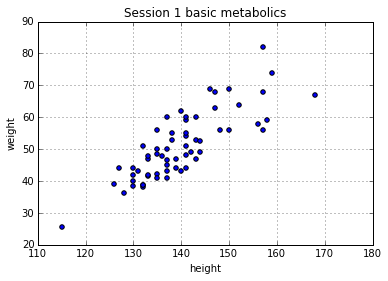

In [126]:
session1.plot(x='height', y='weight', kind='scatter', title='Session 1 basic metabolics', grid=True)

We can make two or more plots programmatically by using a loop, as follows.

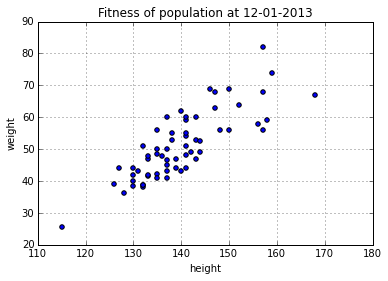

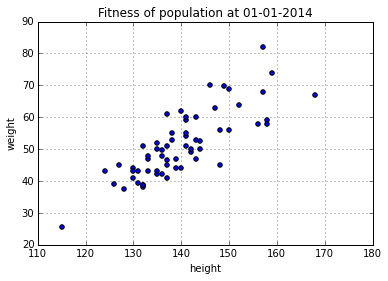

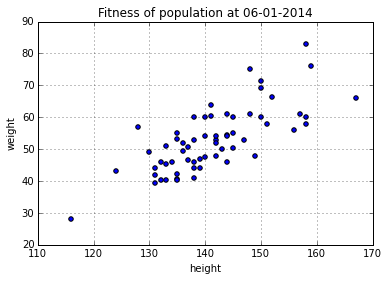

In [127]:
for d in firstTestFitness.controlDate.unique():
    predicate = firstTestFitness['controlDate']==d
    label = 'Fitness of population at {0}'.format(d)
    firstTestFitness.loc[predicate].plot(x='height', y='weight', kind='scatter', title=label, grid=True)

The sentence *firstTestFitness.controlDate.unique()* is candy for *firstTestFitness['controlDate'].unique()*, and *unique*, as its name suggests, is a bound method creating an aggregated of unique values in such column.

Lets split our population even further, by gender.

In [133]:
print session1.loc[session1['gender'] == 1].describe()
print session1.loc[session1['gender'] == 2].describe()

           group    subject  gender     weight      height
count  22.000000  22.000000      22  22.000000   22.000000
mean    4.500000   6.818182       1  52.222727  140.590909
std     2.632218   6.863543       0  11.405593    7.908158
min     1.000000   1.000000       1  38.000000  130.000000
25%     2.000000   2.000000       1  44.700000  135.000000
50%     5.000000   4.000000       1  49.500000  138.500000
75%     7.000000   8.750000       1  55.750000  144.000000
max     7.000000  23.000000       1  82.000000  159.000000
           group    subject  gender     weight      height
count  40.000000  40.000000      40  40.000000   40.000000
mean    4.500000   8.500000       2  50.393750  139.475000
std     2.428464   6.484696       0  10.117022   10.308044
min     1.000000   1.000000       2  25.700000  115.000000
25%     2.000000   4.000000       2  43.150000  132.750000
50%     5.500000   6.500000       2  48.800000  138.000000
75%     7.000000  11.000000       2  58.250000  143.0000

If we assume *age* is equally distributed in both genders, a first conjecture on this data is that *gender = 1* represents boys while *gender = 2* represents girls, since males tend to be taller and heavier than females, although this is obviously true only for adults.

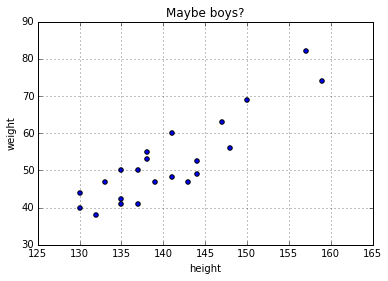

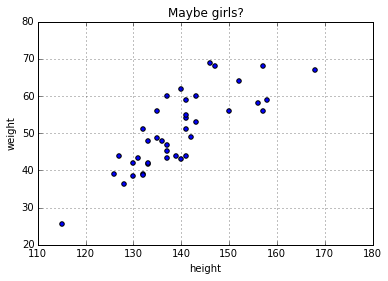

In [137]:
session1.loc[session1['gender'] == 1].plot(x='height', y='weight', grid=True, kind='scatter', title='Maybe boys?')
session1.loc[session1['gender'] == 2].plot(x='height', y='weight', grid=True, kind='scatter', title='Maybe girls?')

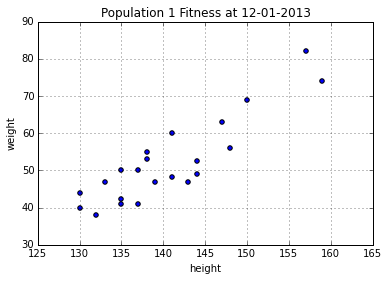

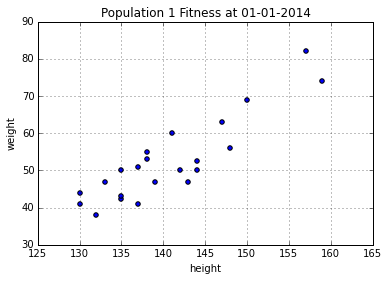

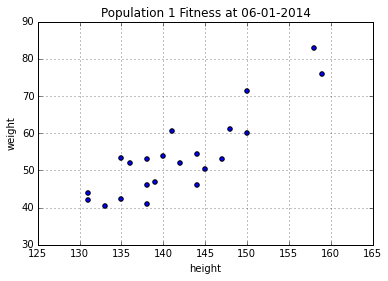

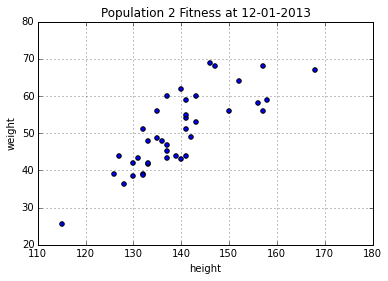

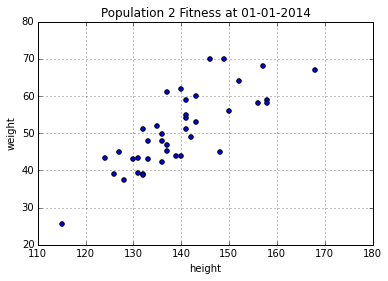

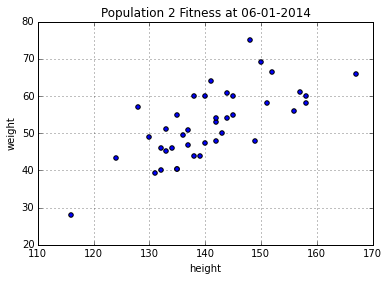

In [141]:
type1pop = firstTestFitness.loc[firstTestFitness['gender'] == 1]
type2pop = firstTestFitness.loc[firstTestFitness['gender'] == 2]

def plotSession(df, idLabel=''):
    for d in df.controlDate.unique():
        predicate = df['controlDate']==d
        label = idLabel + ' Fitness at {0}'.format(d)
        df.loc[predicate].plot(x='height', y='weight', kind='scatter', title=label, grid=True)
        

plotSession(type1pop, idLabel='Population 1')
plotSession(type2pop, idLabel='Population 2')

Let's take into accout age distribution. First, we can take a look at age distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba46f83fd0>]], dtype=object)

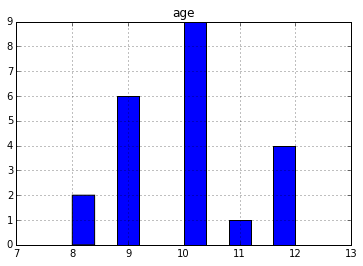

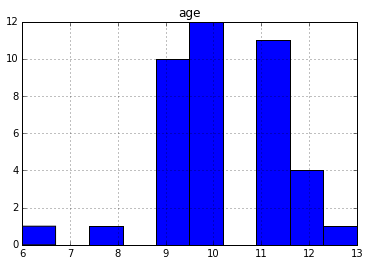

In [164]:
hist = {'kind': 'hist'}

lastControl = database.loc[database['controlDate'] == '06-01-2014']
lastControl[lastControl['gender'] == 1].hist('age', label='Age distribution, group 1')
lastControl[lastControl['gender'] == 2].hist('age', label='Age distribution, group 2')

In [165]:
database.hist?